# Python Scala Vega

This is a text cell. Start editing!

In [1]:
class Player(object):

	def __init__(self, numFifa,displayName,country,lastName,firstName,shirtName,
		dateBirth,position,club,height,caps,goals):
		self.numFifa = int(numFifa)
		self.displayName = displayName
		self.country = country
		self.lastName = lastName
		self.firstName = firstName
		self.shirtName = shirtName
		self.dateBirth = dateBirth
		self.position = position
		self.club = club
		self.height = float(height)
		self.caps = caps
		self.goals = int(goals)
	
	def __str__(self):
		return "numFifa: %d - displayName: %s - country: %s lastName: %s firstName: %s ",
		"- shirtName: %s - dateBirth: %s - position: %s - club: %s - height: %f - caps: %s - goals: %d"%(
			self.numFifa,self.displayName,self.country,self.lastName,self.firstName,
			self.shirtName,self.dateBirth,self.position,self.club,self.height,self.caps,self.goals)

In [2]:
val dataStr = scala.io.Source.fromFile("data/mundial.csv").mkString

In [3]:
from pymongo import MongoClient
mongoClient = MongoClient('localhost',27017)
db = mongoClient.Player
collection = db.Players
def insertCollection(player):
    collection.insert(player)

In [4]:
data = dataStr.split('\n')
data = [x.split('|') for x in data]
data = data[1:len(data) - 1]

player = {'numFifa': '','displayName':'','country':'','lastName':'','firstName':'',
     'shirtName':'','dateBirth':'','position':'','club':'','height':'','caps':'','goals':''}
for x in data:
    player['numFifa'] = x[0]
    player['diplayName'] = x[1]
    player['country'] = x[2]
    player['lastName'] = x[3]
    player['firstName'] = x[4]
    player['shirtName'] = x[5]
    player['dateBirth'] = x[6]
    player['position'] = x[7]
    player['club'] = x[8]
    player['height'] = x[9]
    player['caps'] = x[10]
    player['goals'] = x[11]
    insertCollection(player)
    player = {'numFifa': '','displayName':'','country':'','lastName':'','firstName':'',
     'shirtName':'','dateBirth':'','position':'','club':'','height':'','caps':'','goals':''}

In [5]:
def getGoalsBySelecction(players,countries):
    listGoals = []
    for country in countries:
        goals = 0
        for player in players:
            if(player.country == country):
                goals += player.goals
        listGoals.append((country,goals))
    return listGoals

In [6]:
collPlayers = collection.find()
players = []
countries = []
for x in collPlayers:
    objPlayer = Player(x['numFifa'],x['displayName'],x['country'],x['lastName'],x['firstName'],x['shirtName'],
    x['dateBirth'],x['position'],x['club'],x['height'],x['caps'],x['goals'])
    players.append(objPlayer)
    countries.append(objPlayer.country)
countries = sorted(set(countries))
countriesGoals = sorted(getGoalsBySelecction(players,countries),key=lambda tup:(-tup[1], tup[0]))


In [9]:
from random import sample
countriesSelecteds = sample(countriesGoals,3)
print(countriesSelecteds)

[('Australia', 121), ('Saudi Arabia', 88), ('Costa Rica', 113)]


In [10]:
countryName1 = countriesSelecteds[0][0]
countryName2 = countriesSelecteds[1][0]
countryName3 = countriesSelecteds[2][0]
countryGoal1 = countriesSelecteds[0][1]
countryGoal2 = countriesSelecteds[1][1]
countryGoal3 = countriesSelecteds[2][1]
countryMaxGoals = [goal for (country,goal) in countriesSelecteds]
countryMaxGoals = max(countryMaxGoals)

In [11]:
val country1 = (countryName1,countryGoal1.toInt)
val country2 = (countryName2,countryGoal2.toInt)
val country3 = (countryName3,countryGoal3.toInt)
getMaximunGoals()
def getMaximunGoals(){    
    if(country2._2 > country1._2) println(country2)
    else if (country3._2 > country1._2) println(country3)
    else println(country1)
}


(Australia,121)



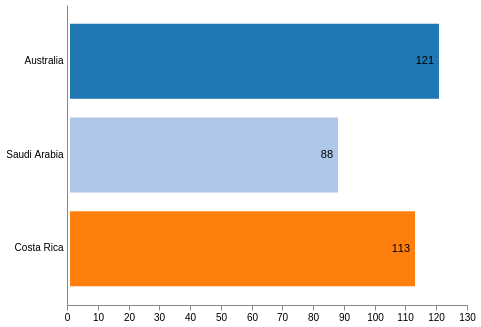

In [12]:
{
  "$schema": "https://vega.github.io/schema/vega/v5.json",
  "width": 400,
  "height": 300,
  "padding": 5,
  "autosize":"pad",
  "data": [
    {
      "name": "data_countries",
      "values": [
        {"category": country1._1, "position":0,"value": country1._2},
        {"category": country2._1,"position":1, "value": country2._2},
        {"category": country3._1, "position":2,"value": country3._2}
      ]
    }
  ],

  "scales": [
    {
      "name": "yscale",
      "type": "band",
      "domain": {"data": "data_countries", "field": "category"},
      "range": "height",
      "padding": 0.2
    },
    {
      "name": "xscale",
      "type": "linear",
      "domain": {"data": "data_countries", "field": "value"},
      "range": "width",
      "round": true,
      "zero": true,
      "nice": true
    },
    {
      "name": "color",
      "type": "ordinal",
      "domain": {"data": "data_countries", "field": "position"},
      "range": {"scheme": "category20"}
    }
  ],

  "axes": [
    {"orient": "left", "scale": "yscale","tickSize": 0, "labelPadding": 4, "zindex": 1},
    {"orient": "bottom", "scale": "xscale"}
  ],

  "marks": [
    {
      "type": "group",

      "from": {
        "facet": {
          "data": "data_countries",
          "name": "facet",
          "groupby": "category"
        }
      },

      "encode": {
        "enter": {
          "y": {"scale": "yscale", "field": "category"}
        }
      },

      "signals": [
        {"name": "height", "update": "bandwidth('yscale')"}
      ],

      "scales": [
        {
          "name": "pos",
          "type": "band",
          "range": "height",
          "domain": {"data": "facet", "field": "position"}
        }
      ],

      "marks": [
        {
          "name": "bars",
          "from": {"data": "facet"},
          "type": "rect",
          "encode": {
            "enter": {
            "y": {"scale": "pos", "field": "position"},
            "height": {"scale": "pos", "band": 1},
            "x": {"scale": "xscale", "field": "value"},
            "x2": {"scale": "xscale", "value": 1},
            "fill": {"scale": "color","field": "position"}
            }
          }
        },
        {
          "type": "text",
          "from": {"data": "bars"},
          "encode": {
            "enter": {
              "x": {"field": "x2", "offset": -5},
              "y": {"field": "y", "offset": {"field": "height", "mult": 0.5}},
              "fill": [
                {"value": "black"}
              ],
              "align": {"value": "right"},
              "baseline": {"value": "middle"},
              "text": {"field": "datum.value"}
            }
          }
        }
      ]
    }
  ],
  "config": {}
}